In [1]:
#Prompt photon classifier using Conv Net
#Original Author: Shamik Ghosh, SINP

#Code port for Python 3.x. Check local keras and tensorflow version with keras.__version__ ,
# tensorflow.__version__ before using code.

#importing libraries, modules, classes 

import time
import tensorflow as tf
import numpy as np
# import graphviz


import matplotlib.pyplot as plt

import keras
import keras.backend as k
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras import optimizers
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D

from keras.utils.np_utils import to_categorical
from keras.utils import plot_model

from keras import regularizers

from sklearn.metrics import roc_curve,auc

Using TensorFlow backend.


In [2]:
dense_layers = [0,1,2]
layer_sizes = [30,40,50]
conv_layers = [0,1]


In [2]:
#The training and Validation data is in output0. <-- Obtained from Geant4



dense_layers = [0,1,2]
layer_sizes = [30,40,50,60,80]
conv_layers = [0,1,2,3]

# slow_adam = optimizers.Adam(lr= 0.0001)

# for dense_layer in dense_layers:
#     for layer_size in layer_sizes:
#         for conv_layer in conv_layers:
#             NAME = "Prmpt_phtns_clsfr-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer+1, layer_size,dense_layer, int(time.time()))
#             tboard = TensorBoard(log_dir='logs/{}'.format(NAME))
#             model = Sequential()

#             model.add(Conv2D(layer_size,(3,3), strides = 1 , padding="same", activation="relu", input_shape = (9,9,1), kernel_regularizer=regularizers.l2(0.01)))
#             model.add(MaxPooling2D(pool_size=(2,2)))
            
#             for l in range(conv_layer-1):
#                 model.add(Conv2D(layer_size,(3,3), strides = 1, activation='relu'))
#                 model.add(MaxPooling2D(pool_size=(2,2)))
            
#             model.add(Flatten())
            
#             for l in range(dense_layer):
#                 model.add(Dense(layer_size, activation='relu'))
                
#             model.add(Dense(Y_Net.shape[1], activation='softmax'))
                
#             model.compile(loss='binary_crossentropy', optimizer = slow_adam, metrics = ['binary_accuracy'])
# #             model.summary()
#             model.fit(X_Net,Y_Net, batch_size=200, epochs=20, shuffle = True, validation_split=0.2, callbacks=[tboard])
 



In [7]:
plot_model(model, to_file='modelCNN.png',show_shapes=True,show_layer_names=True)

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


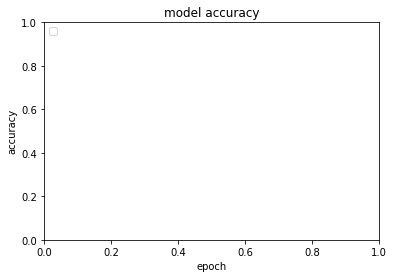

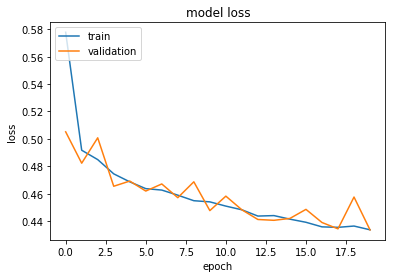

In [4]:
print(history.history.keys())

# plt.plot(history.history['binary_accuracy'])
# plt.show()
# plt.plot(history.history['val_binary_accuracy'])
# plt.show()


plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show("model accuracy")
    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show("model loss")

In [5]:
model.save("prompt_classifier.h5")

In [6]:
model_test = load_model('prompt_classifier.h5')

In [7]:
def give_roc(y_test, y_score):
    
    fpr, tpr, *_ = roc_curve(y_test, y_score )
    print(fpr.shape, tpr.shape)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, 'c', label='ROC curve from CNNModel')
    plt.plot([0, 1], [0, 1], 'k--', label = "ROC curve for random classification")
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Receiver operating characteristic curve')
    plt.legend()
    plt.text(0.5,0.2, 'AUC score:  %f' % roc_auc, fontsize=12)
    plt.savefig('ROC_CNN.png')
#     print('AUC score:  %f' % roc_auc)
    


In [8]:
data_test = np.loadtxt("output1.csv")
data_test.shape

(X_test, y_test)= (data_test[:,0:81],data_test[:,81])

X_test = X_test.reshape(X_test.shape[0], 9,9,1)
   
Y_test = to_categorical(y_test, 2)



Model Test Accuarcy:  81.37666666666667
30000/30000 [==============================] - 1s 24us/step
(7950,) (7950,)


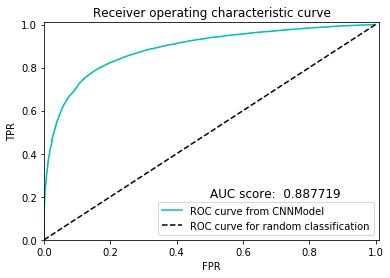

In [9]:

model_test.compile(loss='binary_crossentropy',optimizer='adam',metrics=['binary_accuracy'])

score = model_test.evaluate(X_test, Y_test, verbose=0)

print("Model Test Accuarcy: ", score[1]*100)

y_score = model_test.predict(X_test,verbose=1)

give_roc(Y_test[:,0],y_score[:,0])


In [11]:
k.eval(model.optimizer.lr)

1e-04

In [23]:
def display_deposition_with_classification(i):
    def name(Y_Net):
        if Y_Net[0] == 1:
            return "Halo"
        elif Y_Net[0] == 0:
            return "Prompt"
    xx = X_Net[i,:].reshape(9,9)
    plt.imshow(xx,alpha=0.85, cmap='gray')
    plt.title(name(Y_Net[i,:]))
    plt.show()


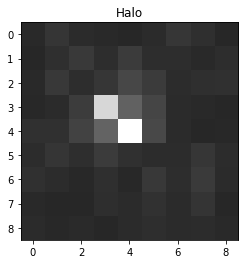

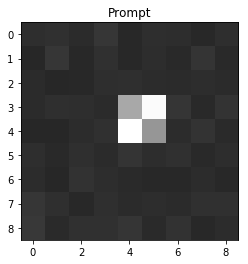

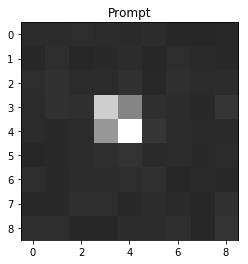

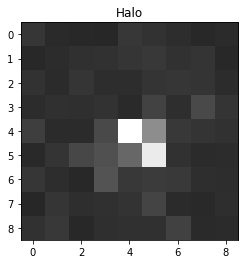

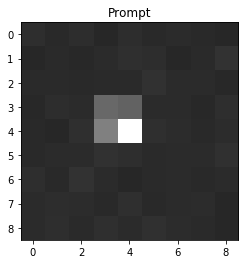

In [24]:
for i in range(5):
    display_deposition_with_classification(i)